### Importing the Libraries

In [1]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

### Reading the Dataset

In [2]:
directory = "./Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name,0)
        dataset.append([image, label])

random.shuffle(dataset)

### Creating x & y

In [3]:
x = []
y = []

for image, label in dataset:
    x.append(image)
    y.append(label)

x = np.array(x)
y = np.array(y)

### Function for Generating Label

In [4]:
def get_label(label):
    if not label:
        return "Grape"
    return "Raisin"

### Displaying some samples

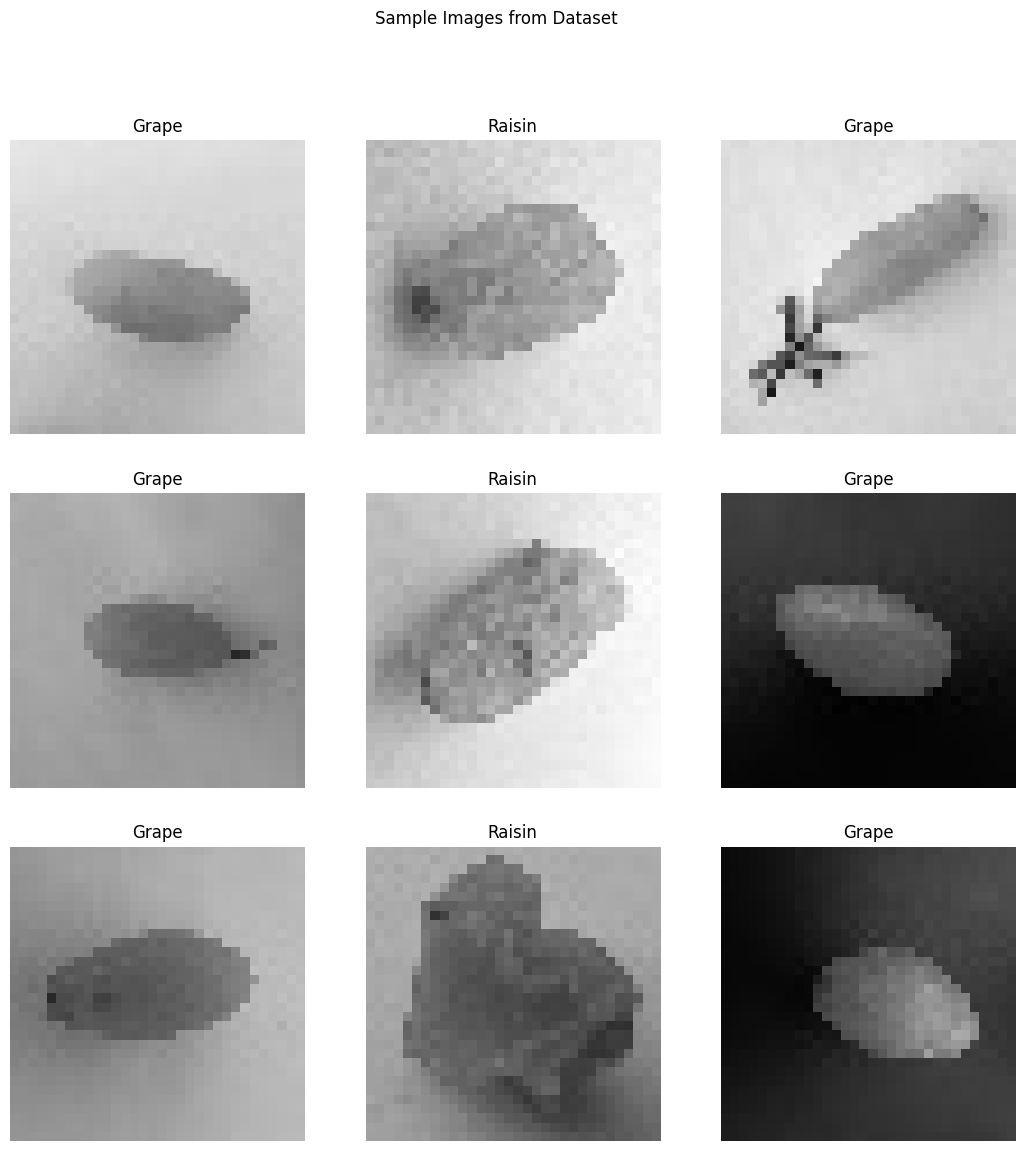

In [5]:
plt.figure(figsize = (13, 13))
for k in range(1, 10):
    plt.subplot(3, 3, k)
    plt.imshow(cv2.cvtColor(x[k], cv2.COLOR_BGR2RGB))
    plt.title(get_label(y[k]))
    plt.axis("off")

plt.suptitle("Sample Images from Dataset")
plt.show()

### Splitting the Dataset into Training & Test Set

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12)

print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (544, 32, 32) (544,)
Validation set: (136, 32, 32) (136,)
Test set: (170, 32, 32) (170,)


### Building the Model

In [7]:
inputs = Input(shape = (32, 32, 1))
x = Flatten()(inputs)
x = Dense(128, activation = "relu")(x)
x = Dense(256, activation = "relu")(x)
x = Dense(512, activation = "relu")(x)
x = Dense(256, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)
outputs = Dense(1, activation = "sigmoid")(x)

model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = Adam(0.00015), loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896

In [8]:
history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_val, y_val))

Epoch 1/20


17/17 [==============================] - 2s 25ms/step - loss: 3.4928 - accuracy: 0.5625 - val_loss: 0.9155 - val_accuracy: 0.7206
Epoch 2/20
17/17 [==============================] - 0s 12ms/step - loss: 1.3676 - accuracy: 0.6544 - val_loss: 0.6696 - val_accuracy: 0.7941
Epoch 3/20
17/17 [==============================] - 0s 10ms/step - loss: 0.5459 - accuracy: 0.7629 - val_loss: 0.5833 - val_accuracy: 0.8088
Epoch 4/20
17/17 [==============================] - 0s 9ms/step - loss: 0.8168 - accuracy: 0.7353 - val_loss: 1.6887 - val_accuracy: 0.5294
Epoch 5/20
17/17 [==============================] - 0s 10ms/step - loss: 0.9330 - accuracy: 0.7077 - val_loss: 0.8118 - val_accuracy: 0.7132
Epoch 6/20
17/17 [==============================] - 0s 9ms/step - loss: 0.5459 - accuracy: 0.7665 - val_loss: 0.5048 - val_accuracy: 0.7721
Epoch 7/20
17/17 [==============================] - 0s 9ms/step - loss: 0.4169 - accuracy: 0.8327 - val_loss: 0.4920 - val_accuracy: 0.8088
Epoch 8/20
17/

### Plotting The Accuracy & Loss Graph

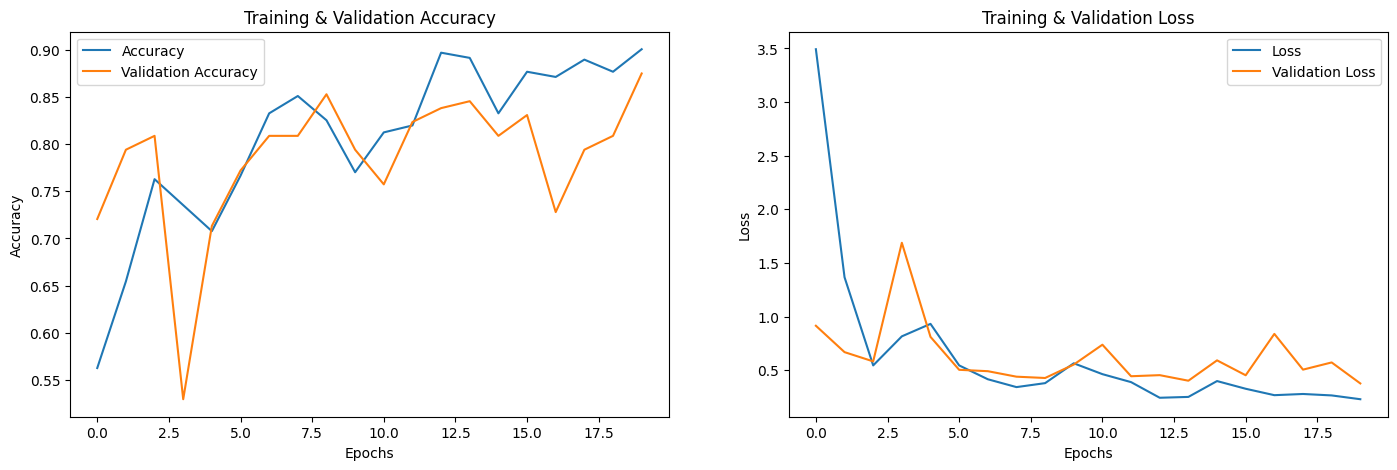

In [9]:
plt.figure(figsize = (17, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label = "Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Evaluating the Model on Test Set

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {round(test_accuracy * 100, 2)}%")
print(f"Test Loss: {round(test_loss * 100, 2)}%")

6/6 [==============================] - 0s 7ms/step - loss: 0.4013 - accuracy: 0.8412
Test Accuracy: 84.12%
Test Loss: 40.13%
